In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

## 1. Library File

In [2]:
# Read the data file and create dataframes from JSON objects
library_file = open("./spotify_data/YourLibrary.json")
library_json = json.load(library_file)
library_file.close()

tracks = library_json["tracks"]
albums = library_json["albums"]
artists = library_json["artists"]

tracks_df = pd.DataFrame.from_records(tracks)
artists_df = pd.DataFrame.from_records(albums)
albums_df = pd.DataFrame.from_records(artists)

tracks_df

,artist,album,track,uri
0,Fleetwood Mac,Rumours,Dreams - 2004 Remaster,spotify:track:0ofHAoxe9vBkTCp2UQIavz
1,Kwaku Asante,Dust,Dust,spotify:track:0kDLOXUS5HwjsK3gzxOqXz
2,Milky Chance,Mind The Moon,Fado,spotify:track:5MX4VZkiJafcUk5gCZ0cil
3,Samuel Jack,Feels Like Summer,Feels Like Summer,spotify:track:0ZERGmkfuDSrLaIzEGFdiH
4,Semiramis Pekkan,Bana Yalan Söylediler / Unuttu Unuttu,Bana Yalan Söylediler,spotify:track:7Beeb1AZSs6YQuAeifdX0n
...,...,...,...,...
1338,BLOK3,VUR,VUR,spotify:track:2Nt4eocAv9wi1vHshhSdpF
1339,Noir,Defected In The House Radio Show: Episode 004 ...,Around - Solomon Vox Mix,spotify:track:7tqWwEVtAsNTUwAonlkuYZ
1340,Swedish House Mafia,Paradise Again,Moth To A Flame (with The Weeknd),spotify:track:0VO8gYVDSwM1Qdd2GsMoYK
1341,Polo & Pan,Caravelle,Canopée,spotify:track:260V7huyJrXnyYe0dFv2Fa


### 1.1. Liked Tracks by Artist

In [3]:
# Group tracks by artist and get counts
artist_to_count = tracks_df.groupby("artist").count()["album"].sort_values(ascending=False)

top_10 = artist_to_count[0: 10]
x = list(top_10.keys())
y = list(top_10.values)

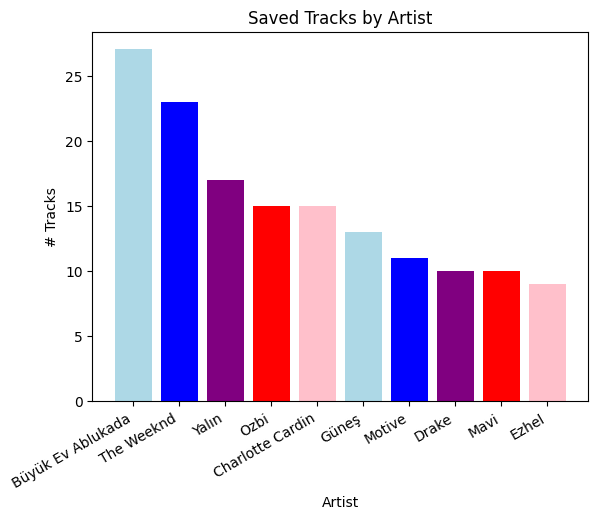

In [4]:
# Plot saved tracks by artist as a bar plot
color = ['lightblue', 'blue', 'purple', 'red', 'pink']

plt.xticks(rotation=30, ha='right')
plt.bar(x, y, color=color)
plt.title("Saved Tracks by Artist")
plt.xlabel("Artist")
plt.ylabel("# Tracks")

plt.show()

### 1.2. Liked Tracks by Album

In [5]:
# Group tracks by artist and get counts
album_to_count = tracks_df.groupby("album").count()["artist"].sort_values(ascending=False)

top_10 = album_to_count[0: 10]
x = list(top_10.keys())
y = list(top_10.values)

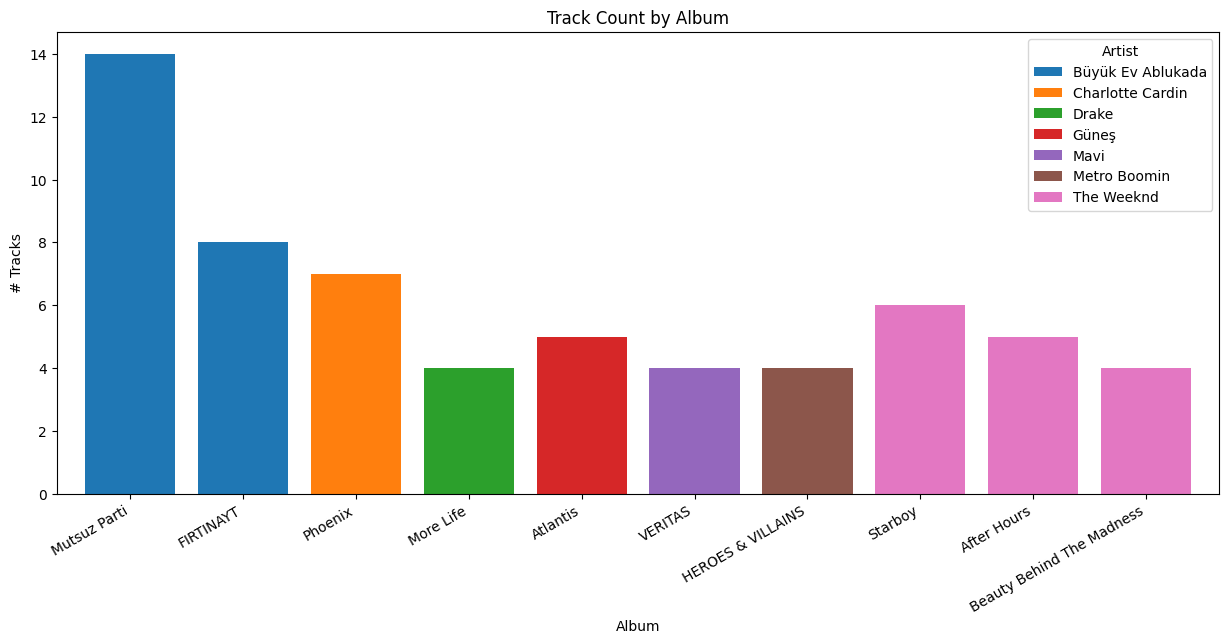

In [251]:
df_filtered = tracks_df[tracks_df["album"].isin(x)]

# Group by artist and album, and then count the tracks
grouped_data = df_filtered.groupby(['artist', 'album']).size().unstack(fill_value=0)
columns = list(grouped_data.T.columns)
grouped_data = grouped_data.T.sort_values(columns, ascending=False)

# Create a bar plot
fig, ax = plt.subplots(figsize=(15, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax, width=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Set titles
ax.set_title('Track Count by Album')
ax.set_xlabel('Album')
ax.set_ylabel('# Tracks')

# Set legend
ax.legend(title='Artist', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

## 2. Aggregating Data 

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
import os

load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

def get_track_audio_features(track_id):
    # Set up authentication
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

    # Get audio features for the track
    audio_features = sp.audio_features([track_id])

    # Return the retrieved information
    return audio_features

In [8]:
# Now aggregate the tracks with audio features
rows = []
total = tracks_df.shape[0]

for row in tracks_df.itertuples():
    try: 
        artist = row[1]
        album = row[2]
        track = row[3]
        track_id = row[4][14:]

        print(f"Processing track: {track_id}: {row[0] + 1}/{total}")

        features = get_track_audio_features(track_id)[0]
        features["track_id"] = track_id
        features["track_name"] = track
        features["artist"] = artist
        features["album"] = album

        rows.append(features)
    except:
        pass

Processing track: 0ofHAoxe9vBkTCp2UQIavz: 1/1343
Processing track: 0kDLOXUS5HwjsK3gzxOqXz: 2/1343
Processing track: 5MX4VZkiJafcUk5gCZ0cil: 3/1343
Processing track: 0ZERGmkfuDSrLaIzEGFdiH: 4/1343
Processing track: 7Beeb1AZSs6YQuAeifdX0n: 5/1343
Processing track: 5UPMgpXpZeaCfbKdyRFYvw: 6/1343
Processing track: 1CQ2cMfrmFM1YdfmjENKVE: 7/1343
Processing track: 7MUxfF3XpoZ7vMs12uqBvr: 8/1343
Processing track: 5BG9s0tpkw5ZPDsfhVzwRz: 9/1343
Processing track: 0yacFoupTf2z0Hk5QDFPGn: 10/1343
Processing track: 30Qfv5QVqwabDr32gOWpXW: 11/1343
Processing track: 5flH7FY4ledAQboO5a0XQ5: 12/1343
Processing track: 4ydqTAEY9W5RsHW6JgXgcL: 13/1343
Processing track: 2iI0RV3TG7VKUwpOmGWIVs: 14/1343
Processing track: 4lLtanYk6tkMvooU0tWzG8: 15/1343
Processing track: 0qkiqi58PtFREehR3lB9uF: 16/1343
Processing track: 6IVsYkP3RWt3AwMeHOgDFF: 17/1343
Processing track: 5iQzKryLiRfCbid0mP75pb: 18/1343
Processing track: 6MOEQCtAWNSCmvg3SFKF5y: 19/1343
Processing track: 3xQina9PA7ibCZ00oklQmG: 20/1343
Processin

Max Retries reached


Processing track: 5D7NWjdLIqHbAwpzrofyum: 1216/1343


Max Retries reached


Processing track: 2gGkonSKCf7NWijEhDKPdw: 1217/1343


Max Retries reached


Processing track: 4jDmJ51x1o9NZB5Nxxc7gY: 1218/1343


Max Retries reached


Processing track: 50x1Ic8CaXkYNvjmxe3WXy: 1219/1343


Max Retries reached


Processing track: 1ymvyDsiAUbzEhmSkfCSYh: 1220/1343


Max Retries reached


Processing track: 556PgdX25w8m9j3GYmTdXH: 1221/1343


Max Retries reached


Processing track: 3NWhRNp75M7bEZZH1nWzMw: 1222/1343


Max Retries reached


Processing track: 75HBVc7kJLjC2LlPc4ScfH: 1223/1343


Max Retries reached


Processing track: 6g95dK7o7vVh8ZCnDAseU5: 1224/1343


Max Retries reached


Processing track: 4jbU3i1bwqInfG2YPjxH5q: 1225/1343


Max Retries reached


Processing track: 6o5KebfdkkP0NWzpDFuXt7: 1226/1343


Max Retries reached


Processing track: 2INnY9ONQp4z7C7N1HBg46: 1227/1343


Max Retries reached


Processing track: 5E1gxNXvUGvpvUECz54xXm: 1228/1343


Max Retries reached


Processing track: 6AkvQkmhK3D94hSJZpwBT8: 1229/1343


Max Retries reached


Processing track: 6R85OUNqlEsPcjh2UC1cB1: 1230/1343


Max Retries reached


Processing track: 4PmnCafj5tsr7U5PWyxiHP: 1231/1343


Max Retries reached


Processing track: 4u8IMzrDUt5LujU8wlfk90: 1232/1343


Max Retries reached


Processing track: 7cY3q6uDDuPfh36fqxPEPy: 1233/1343


Max Retries reached


Processing track: 2gQK13gXYZRq2MgvPJyHx8: 1234/1343


Max Retries reached


Processing track: 62ke5zFUJN6RvtXZgVH0F8: 1235/1343


Max Retries reached


Processing track: 3MVFApkSoJ2v3q86f0FYlQ: 1236/1343


Max Retries reached


Processing track: 1rQzgEIUunLMvAUSYJIzyl: 1237/1343


Max Retries reached


Processing track: 5i9YJPhJo1RrWHKjkbkgmk: 1238/1343


Max Retries reached


Processing track: 3P0WmQXWzV3yqFyfgVolrT: 1239/1343


Max Retries reached


Processing track: 0zL9dieoCcjBWV01y73Cj1: 1240/1343


Max Retries reached


Processing track: 7bTpDFKTd8GiLzrDclmCjh: 1241/1343


Max Retries reached


Processing track: 2MdoVJfbVNOsZx9AQ7Eqjh: 1242/1343


Max Retries reached


Processing track: 7gUpO6td4OOnu0Lf9vhcIV: 1243/1343


Max Retries reached


Processing track: 1Vk4yRsz0iBzDiZEoFMQyv: 1244/1343


Max Retries reached


Processing track: 1jhnbRVTmRJjnRhabesRqn: 1245/1343


Max Retries reached


Processing track: 0nflAeZiylI7WYHGSyiX3L: 1246/1343


Max Retries reached


Processing track: 632sVoSYD8lbBf3SOl58VA: 1247/1343


Max Retries reached


Processing track: 2QeQNF182V61Im0QpjdVta: 1248/1343


Max Retries reached


Processing track: 7svpAkwc6xaSxlbZ7V7JiS: 1249/1343


Max Retries reached


Processing track: 3CVRPpVg51eQTc1UBozEH8: 1250/1343


Max Retries reached


Processing track: 28luqgS4NCuFKP6YSOtia5: 1251/1343


Max Retries reached


Processing track: 6WzRpISELf3YglGAh7TXcG: 1252/1343


Max Retries reached


Processing track: 3zl6RhRSsOA9m99ORRItIU: 1253/1343


Max Retries reached


Processing track: 5h9BzsKNTR7vW1dmdsKRB2: 1254/1343
Processing track: 0WQiDwKJclirSYG9v5tayI: 1255/1343


Max Retries reached


Processing track: 22WbyoUfhha9v1gTwlR0LH: 1256/1343


Max Retries reached


Processing track: 525GY0mXYnxajolwgS8Eaz: 1257/1343


Max Retries reached


Processing track: 2HdgaqskuT2sRMtGwPDI53: 1258/1343


Max Retries reached


Processing track: 5joli7PUqTibPuAykaN2sN: 1259/1343


Max Retries reached


Processing track: 6gD0YsSaGEvPLG12FEo6FP: 1260/1343


Max Retries reached


Processing track: 755inykyaG4w22GWAsA3MX: 1261/1343


Max Retries reached


Processing track: 37y7iDayfwm3WXn5BiAoRk: 1262/1343


Max Retries reached


Processing track: 2w59R5FBFlGbZKWQe4pYIj: 1263/1343


Max Retries reached


Processing track: 7afkCVFaZhO64ycp8zVkwF: 1264/1343


Max Retries reached


Processing track: 3VZH5YUlVZofUjTx6HwdwG: 1265/1343


Max Retries reached


Processing track: 2EHVjRFRSsXQaHAsys74Us: 1266/1343


Max Retries reached


Processing track: 3AJwUDP919kvQ9QcozQPxg: 1267/1343


Max Retries reached


Processing track: 1B62o4CbdL9ckGvwsz2cgn: 1268/1343


Max Retries reached


Processing track: 40sUznaxaBvL5nEDTO5Trq: 1269/1343


Max Retries reached


Processing track: 6PERP62TejQjgHu81OHxgM: 1270/1343


Max Retries reached


Processing track: 1KGi9sZVMeszgZOWivFpxs: 1271/1343


Max Retries reached


Processing track: 2ctvdKmETyOzPb2GiJJT53: 1272/1343


Max Retries reached


Processing track: 7AsWVlCvnAdFVWiBJklg0H: 1273/1343


Max Retries reached


Processing track: 3EX3DA7JY2mGsBVAvIYfwB: 1274/1343


Max Retries reached


Processing track: 2STIbgjW6oD4qc1odTNrqT: 1275/1343


Max Retries reached


Processing track: 24MWSatP5sTylISvJONhnB: 1276/1343


Max Retries reached


Processing track: 56N9s9PS6VwGolUnx1CJkv: 1277/1343


Max Retries reached


Processing track: 57e5ib2PnvuiaTvaI4jGDp: 1278/1343


Max Retries reached


Processing track: 2jUO4Rbw8VizhpHS63jrq4: 1279/1343


Max Retries reached


Processing track: 1PvpXgas3bqGGCYcm6ggRf: 1280/1343


Max Retries reached


Processing track: 0ni7a9ONGdNoUvDvSCgLoJ: 1281/1343


Max Retries reached


Processing track: 2OPCGQHz6Gi7U7aDShfhR8: 1282/1343


Max Retries reached


Processing track: 6OSRS4mNwTCE92ujmXgUhc: 1283/1343


Max Retries reached


Processing track: 04x2DO5e8XDhjYvenuFRHp: 1284/1343


Max Retries reached


Processing track: 6YHNQFONuQrpENSb59jgns: 1285/1343


Max Retries reached


Processing track: 1L7W7G37sxUhikHIJCgEMh: 1286/1343


Max Retries reached


Processing track: 3QXwNLHixxu4HKlMcJgXsk: 1287/1343


Max Retries reached


Processing track: 6Y7ZEVr7lgO8FKGk2vZ2hi: 1288/1343


Max Retries reached


Processing track: 4wupcNmslmA9A5O0sjBGQq: 1289/1343


Max Retries reached


Processing track: 2fJG9sEeJJc5gxwxJMNbQu: 1290/1343


Max Retries reached


Processing track: 0kyGY7bztpRgb26xQbFW1b: 1291/1343


Max Retries reached


Processing track: 63T7DJ1AFDD6Bn8VzG6JE8: 1292/1343


Max Retries reached


Processing track: 65tIJClJx8fHo6YW4wVDhi: 1293/1343


Max Retries reached


Processing track: 4Ro98RCK90oHqqSZUnTFq5: 1294/1343


Max Retries reached


Processing track: 2rCbl9naJYhaxjLsfx88uM: 1295/1343


Max Retries reached


Processing track: 28nynuyo2jMTzMyT146Bvu: 1296/1343


Max Retries reached


Processing track: 0bVtevEgtDIeRjCJbK3Lmv: 1297/1343


Max Retries reached


Processing track: 6Hkf6Ruuy0y39zXkOG9lKN: 1298/1343


Max Retries reached


Processing track: 0km1uWAlAbVKaaNZ2nQ87n: 1299/1343


Max Retries reached


Processing track: 3pFlX8RJORG2EX3v6GK8ya: 1300/1343


Max Retries reached


Processing track: 7McZS9J6h0SKoZBR6cfcFe: 1301/1343


Max Retries reached


Processing track: 6tB4XVKceo2307SSWXaO0y: 1302/1343


Max Retries reached


Processing track: 6aommJFM8i3iT4inKuDSXh: 1303/1343


Max Retries reached


Processing track: 11PO9iu6PtpgL1JK4QNUEJ: 1304/1343


Max Retries reached


Processing track: 2pACOpgaJOULkKFatoEbAR: 1305/1343


Max Retries reached


Processing track: 0iLicFNAMT18xb36wBrRNl: 1306/1343


Max Retries reached


Processing track: 38Jz3DhIqpnF9E1jtb5vbx: 1307/1343


Max Retries reached


Processing track: 4s6p0rVzSaWqaJRsp0HBDI: 1308/1343


Max Retries reached


Processing track: 3yBwuJd2sHdTrPF8RJrenP: 1309/1343


Max Retries reached


Processing track: 1lhSE0pNwXdcki3BIgBLL2: 1310/1343


Max Retries reached


Processing track: 5fnA9mkIfScSqHIpeDyvck: 1311/1343


Max Retries reached


Processing track: 2DgdHcjWmO3qd50RzuBLgZ: 1312/1343


Max Retries reached


Processing track: 6rrTr2HEAzlpC4KWZxF3S1: 1313/1343


Max Retries reached


Processing track: 2yBJl0GhUkpOhMvI9CHyyo: 1314/1343


Max Retries reached


Processing track: 3wledcRROg8EvoTbc27Xfw: 1315/1343


Max Retries reached


Processing track: 3VlRVDH7wHZois3BLNXzne: 1316/1343


Max Retries reached


Processing track: 3GXgrEjBjonrQrPEEi13yU: 1317/1343


Max Retries reached


Processing track: 10SXKV8mddSJm6Dsj0Oe4s: 1318/1343


Max Retries reached


Processing track: 5j97tfPa0kGi0ieKQRiLRf: 1319/1343


Max Retries reached


Processing track: 73PAbYaVbnFG0tQ4aBfxeN: 1320/1343


Max Retries reached


Processing track: 6Bjtr3tPdto5nyuLYf61sN: 1321/1343


Max Retries reached


Processing track: 29kUiQdEvB9q7joHiYZNJ3: 1322/1343


Max Retries reached


Processing track: 5oI7DRnR8iIRDGJMGdbPiQ: 1323/1343


Max Retries reached


Processing track: 1BbUq9wc4N2q53fR9S6NsZ: 1324/1343


Max Retries reached


Processing track: 5znEiVKJITQ1JProGoHht6: 1325/1343


Max Retries reached


Processing track: 1Gsv8f8KmowkF5BnfMIGKy: 1326/1343


Max Retries reached


Processing track: 4vRaGGiQN6l2LiQxSFg6ZP: 1327/1343


Max Retries reached


Processing track: 5ztIul377mylwHJkCnIWbn: 1328/1343


Max Retries reached


Processing track: 2ti5PWtBfPopjjfZiKt84m: 1329/1343


Max Retries reached


Processing track: 4wg0lqLVLGb7u16v4LONMX: 1330/1343


Max Retries reached


Processing track: 57RA3JGafJm5zRtKJiKPIm: 1331/1343


Max Retries reached


Processing track: 0TFhDjZzktweZS0djDlxuU: 1332/1343


Max Retries reached


Processing track: 2ZWlPOoWh0626oTaHrnl2a: 1333/1343


Max Retries reached


Processing track: 05RmevbSKDvHHKpYBoXYfR: 1334/1343


Max Retries reached


Processing track: 6Md0VfGaWXZgJc53IMqPkO: 1335/1343


Max Retries reached


Processing track: 3YC7FYhduZbYObLRCdhANa: 1336/1343


Max Retries reached


Processing track: 5hQRNdaLnqlFYhBiVFMptc: 1337/1343


Max Retries reached


Processing track: 54Eg7RURqC87jVBoPmcAPe: 1338/1343


Max Retries reached


Processing track: 2Nt4eocAv9wi1vHshhSdpF: 1339/1343


Max Retries reached


Processing track: 7tqWwEVtAsNTUwAonlkuYZ: 1340/1343


Max Retries reached


Processing track: 0VO8gYVDSwM1Qdd2GsMoYK: 1341/1343


Max Retries reached


Processing track: 260V7huyJrXnyYe0dFv2Fa: 1342/1343


Max Retries reached


Processing track: 1qEmFfgcLObUfQm0j1W2CK: 1343/1343


Max Retries reached


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,track_id,track_name,artist,album
0,0.828,0.492,0,-9.744,1,0.0276,0.06440,0.004280,0.1280,0.7890,...,0ofHAoxe9vBkTCp2UQIavz,spotify:track:0ofHAoxe9vBkTCp2UQIavz,https://api.spotify.com/v1/tracks/0ofHAoxe9vBk...,https://api.spotify.com/v1/audio-analysis/0ofH...,257800,4,0ofHAoxe9vBkTCp2UQIavz,Dreams - 2004 Remaster,Fleetwood Mac,Rumours
1,0.560,0.535,7,-7.608,1,0.2210,0.37100,0.000145,0.0860,0.4000,...,0kDLOXUS5HwjsK3gzxOqXz,spotify:track:0kDLOXUS5HwjsK3gzxOqXz,https://api.spotify.com/v1/tracks/0kDLOXUS5Hwj...,https://api.spotify.com/v1/audio-analysis/0kDL...,262564,4,0kDLOXUS5HwjsK3gzxOqXz,Dust,Kwaku Asante,Dust
2,0.821,0.540,3,-7.001,1,0.0683,0.20300,0.000657,0.1020,0.5870,...,5MX4VZkiJafcUk5gCZ0cil,spotify:track:5MX4VZkiJafcUk5gCZ0cil,https://api.spotify.com/v1/tracks/5MX4VZkiJafc...,https://api.spotify.com/v1/audio-analysis/5MX4...,250400,4,5MX4VZkiJafcUk5gCZ0cil,Fado,Milky Chance,Mind The Moon
3,0.751,0.713,5,-5.846,0,0.0654,0.02460,0.000027,0.1570,0.4740,...,0ZERGmkfuDSrLaIzEGFdiH,spotify:track:0ZERGmkfuDSrLaIzEGFdiH,https://api.spotify.com/v1/tracks/0ZERGmkfuDSr...,https://api.spotify.com/v1/audio-analysis/0ZER...,187095,4,0ZERGmkfuDSrLaIzEGFdiH,Feels Like Summer,Samuel Jack,Feels Like Summer
4,0.309,0.606,3,-10.544,0,0.0771,0.72800,0.009430,0.7540,0.4490,...,7Beeb1AZSs6YQuAeifdX0n,spotify:track:7Beeb1AZSs6YQuAeifdX0n,https://api.spotify.com/v1/tracks/7Beeb1AZSs6Y...,https://api.spotify.com/v1/audio-analysis/7Bee...,238654,4,7Beeb1AZSs6YQuAeifdX0n,Bana Yalan Söylediler,Semiramis Pekkan,Bana Yalan Söylediler / Unuttu Unuttu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0.796,0.808,2,-5.432,1,0.0499,0.03910,0.101000,0.1950,0.5740,...,2pt41XKgycdBxDa1lfCROi,spotify:track:2pt41XKgycdBxDa1lfCROi,https://api.spotify.com/v1/tracks/2pt41XKgycdB...,https://api.spotify.com/v1/audio-analysis/2pt4...,174000,4,2pt41XKgycdBxDa1lfCROi,Şaka Yaptım - Armageddon Turk 'Arada' Mix,Gülden Karaböcek,Arada
1206,0.609,0.674,3,-7.152,0,0.2170,0.14600,0.000008,0.1280,0.2980,...,2XruYLgVQP1cgTO4QpH8pJ,spotify:track:2XruYLgVQP1cgTO4QpH8pJ,https://api.spotify.com/v1/tracks/2XruYLgVQP1c...,https://api.spotify.com/v1/audio-analysis/2Xru...,156750,4,2XruYLgVQP1cgTO4QpH8pJ,hatırla,Revart,hatırla
1207,0.646,0.856,9,-4.863,0,0.0312,0.00415,0.000232,0.0950,0.0391,...,4lTYeSZmxfkMwiHHqNdcKm,spotify:track:4lTYeSZmxfkMwiHHqNdcKm,https://api.spotify.com/v1/tracks/4lTYeSZmxfkM...,https://api.spotify.com/v1/audio-analysis/4lTY...,186149,4,4lTYeSZmxfkMwiHHqNdcKm,Wish Me Luck,Agoria,Lucky
1208,0.553,0.380,4,-10.697,0,0.0473,0.72100,0.000000,0.1190,0.3590,...,5LPgor25Umb3jZgvTXvBeh,spotify:track:5LPgor25Umb3jZgvTXvBeh,https://api.spotify.com/v1/tracks/5LPgor25Umb3...,https://api.spotify.com/v1/audio-analysis/5LPg...,212062,4,5LPgor25Umb3jZgvTXvBeh,Sen Benim Şarkılarımsın,Cem Adrian,Sen Benim Şarkılarımsın


In [13]:
# Check info to see summary of columns
aggregated_df = pd.DataFrame(rows)
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1210 non-null   float64
 1   energy            1210 non-null   float64
 2   key               1210 non-null   int64  
 3   loudness          1210 non-null   float64
 4   mode              1210 non-null   int64  
 5   speechiness       1210 non-null   float64
 6   acousticness      1210 non-null   float64
 7   instrumentalness  1210 non-null   float64
 8   liveness          1210 non-null   float64
 9   valence           1210 non-null   float64
 10  tempo             1210 non-null   float64
 11  type              1210 non-null   object 
 12  id                1210 non-null   object 
 13  uri               1210 non-null   object 
 14  track_href        1210 non-null   object 
 15  analysis_url      1210 non-null   object 
 16  duration_ms       1210 non-null   int64  


In [38]:
# Drop unnecessary columns
library_df = aggregated_df.drop(columns=["type", "id", "uri", "track_href", "analysis_url"])

# Rearrange the ordering
desired_order = ["track_id", "track_name", "artist", "album", "danceability", "energy", "key", "loudness", "mode", "speechiness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]
library_df = library_df[desired_order]

library_df.to_csv("./custom_data/library.csv")

## 3. Aggregated Library Analysis

In [37]:
plot_df = library_df[["danceability", "energy", "loudness", "speechiness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]]

### 3.1. Audio features with respect to time

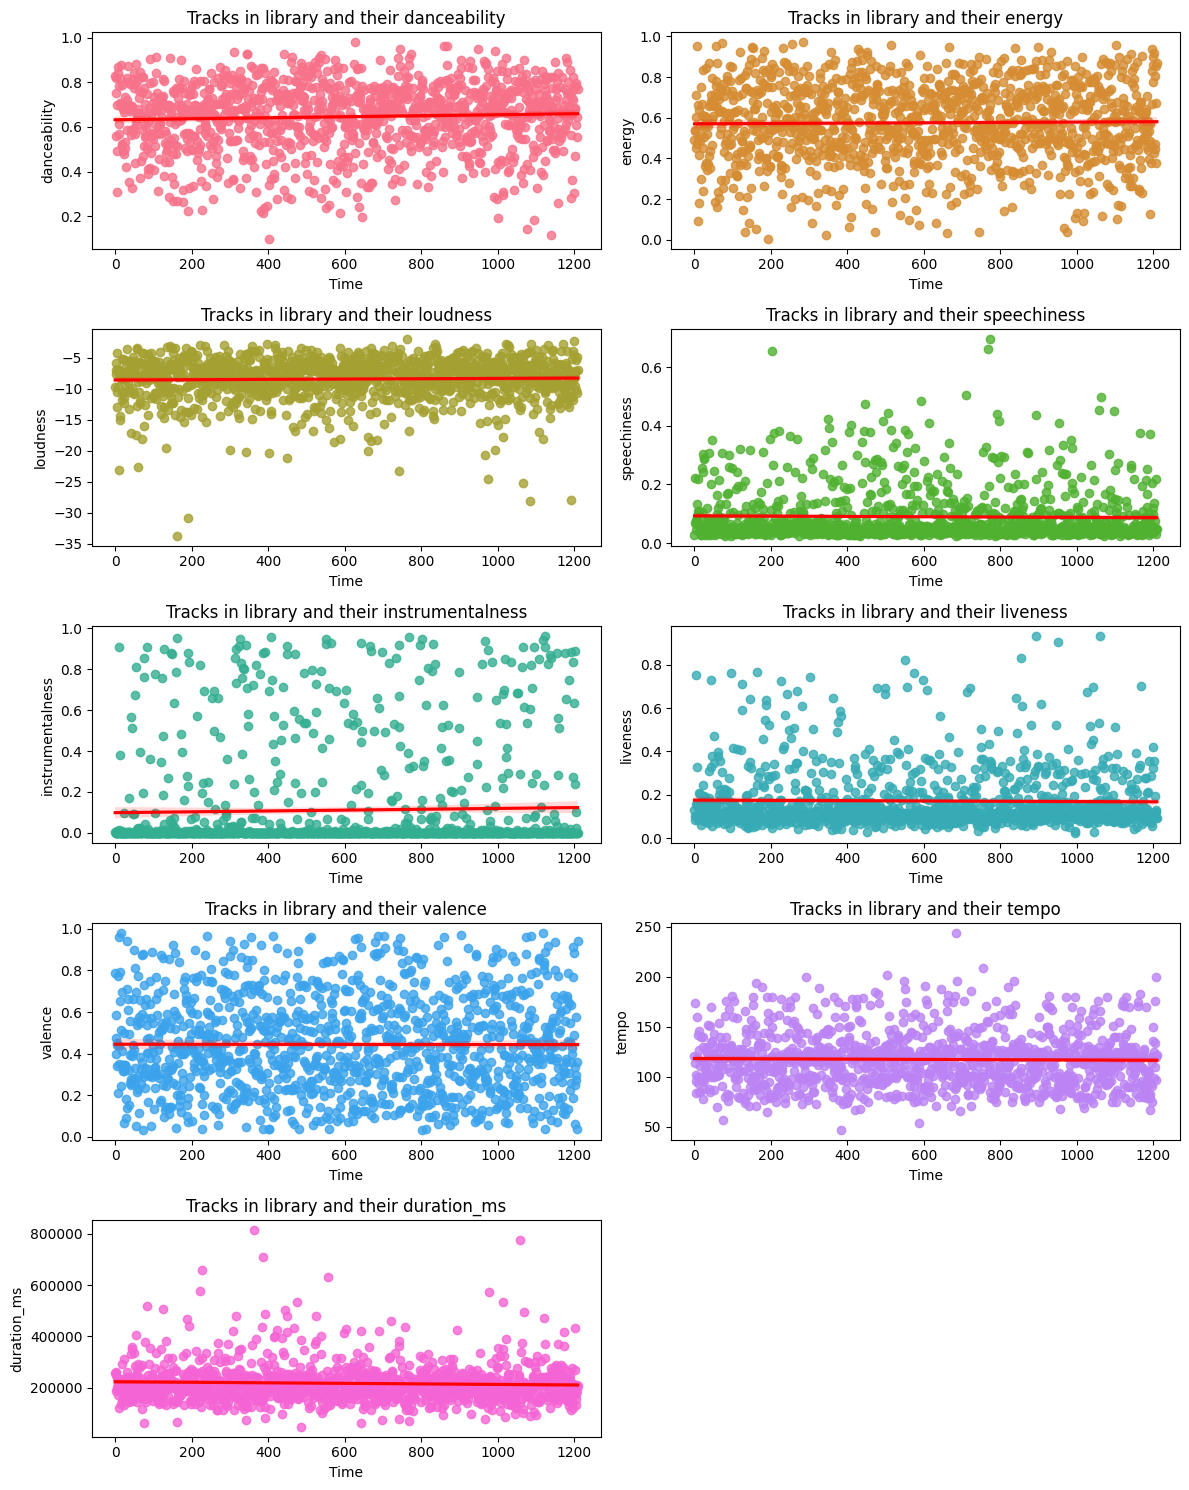

In [252]:
# Get the number of columns in plot_df
num_columns = len(plot_df.columns)

# Set up subplots with two plots per row
fig, axes = plt.subplots(nrows=(num_columns + 1) // 2, ncols=2, figsize=(12, 3 * ((num_columns + 1) // 2)))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Define a color palette with a different color for each column
color_palette = sns.color_palette("husl", num_columns)

# Loop through each column and create a scatter plot with a regression line
for i, column in enumerate(plot_df.columns):
    sns.regplot(x=plot_df.index, y=column, data=plot_df, ax=axes[i], scatter_kws={'color': color_palette[i]}, line_kws={'color': "red"})
    axes[i].set_title(f'Tracks in library and their {column}')
    axes[i].set_xlabel('Time') 
    axes[i].set_ylabel(column)

# Remove any empty subplots
for j in range(num_columns, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

### 3.2. Number of tracks by audio features

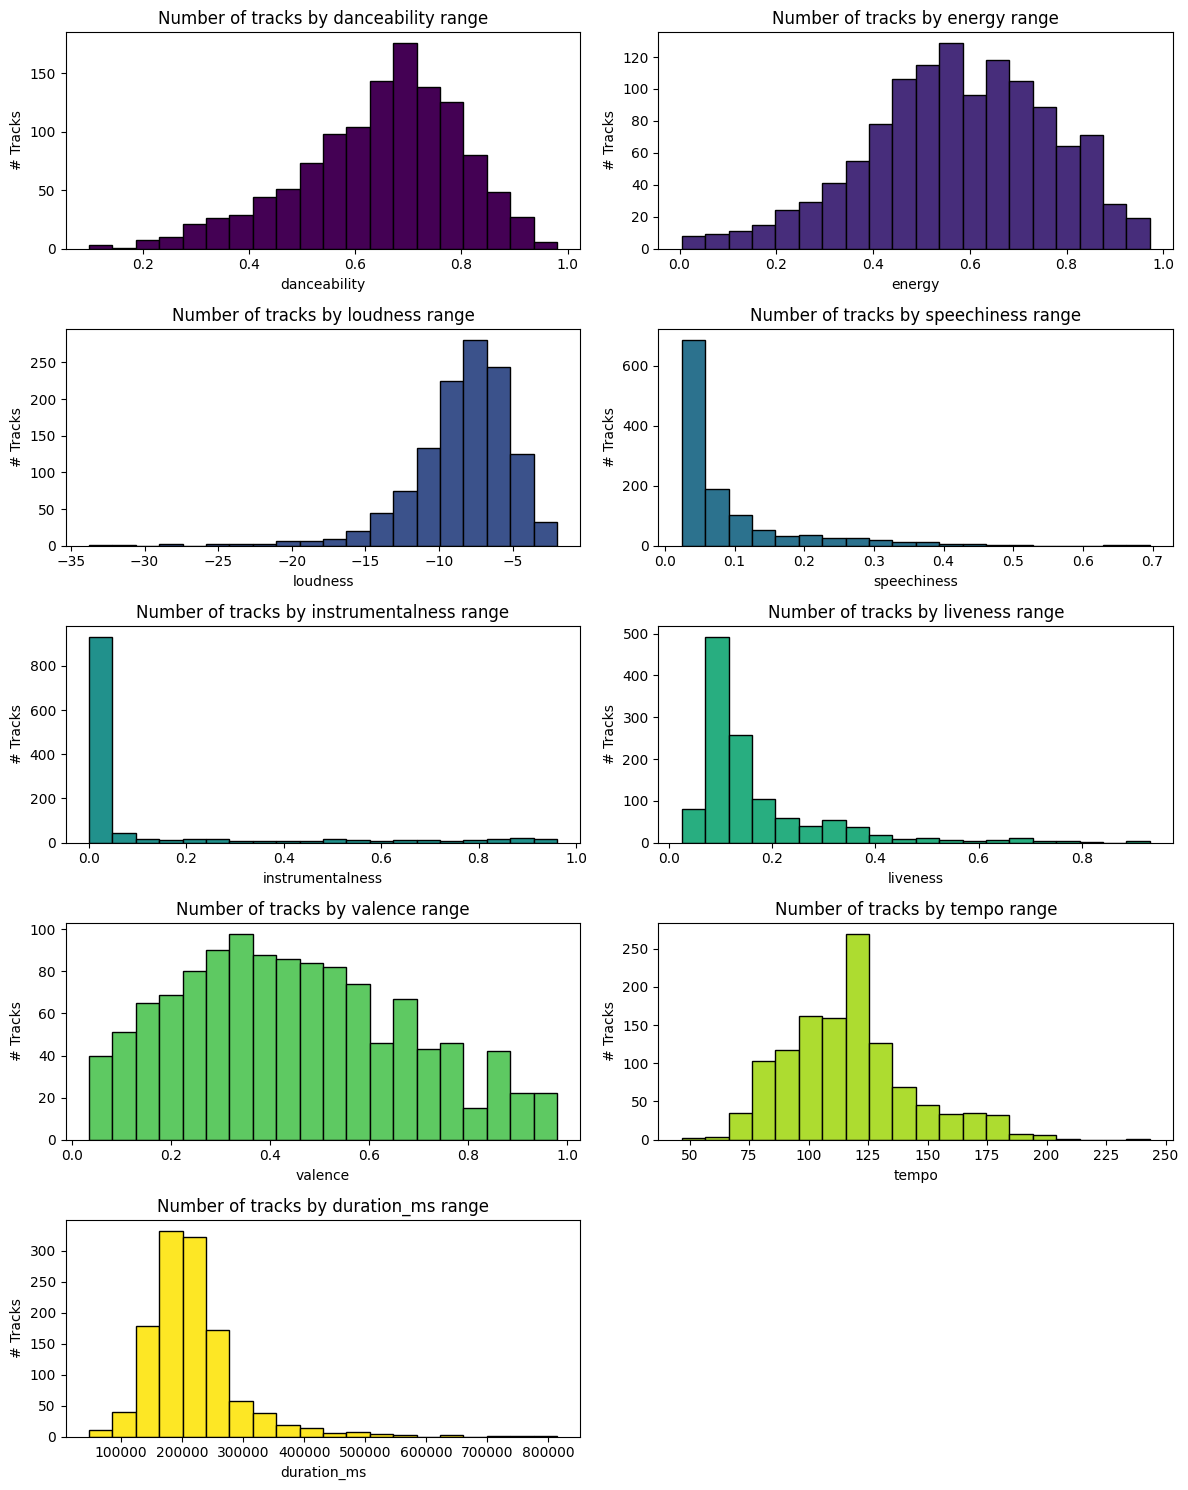

In [254]:
# Get the number of columns in plot_df
num_columns = len(plot_df.columns)

# Set up subplots with two plots per row
fig, axes = plt.subplots(nrows=(num_columns + 1) // 2, ncols=2, figsize=(12, 3 * ((num_columns + 1) // 2)))

# Flatten the axes array to simplify indexing
axes = axes.flatten()
colors = plt.cm.viridis(np.linspace(0, 1, num_columns))

# Loop through each column and create a histogram subplot
for i, column in enumerate(plot_df.columns):
    axes[i].hist(plot_df[column], bins=20, color=colors[i], edgecolor='black')
    axes[i].set_title(f'Number of tracks by {column} range')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('# Tracks')


# Remove any empty subplots
for j in range(num_columns, len(axes)):
    fig.delaxes(axes[j])
    
# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## 4. Streaming History Analysis

In [78]:
# Read the data file and create dataframes from JSON objects
streaming_file_0 = open("./spotify_data/StreamingHistory0.json")
streaming_file_1 = open("./spotify_data/StreamingHistory1.json")
streaming_file_2 = open("./spotify_data/StreamingHistory2.json")
streaming_json_0 = json.load(streaming_file_0)
streaming_json_1 = json.load(streaming_file_1)
streaming_json_2 = json.load(streaming_file_2)
streaming_file_0.close()
streaming_file_1.close()
streaming_file_2.close()

streaming_df = pd.DataFrame.from_records(streaming_json_0)
streaming_df_1 = pd.DataFrame.from_records(streaming_json_1)
streaming_df_2 = pd.DataFrame.from_records(streaming_json_2)

streaming_df = streaming_df.append(streaming_df_1, ignore_index=True)
streaming_df = streaming_df.append(streaming_df_2, ignore_index=True)

streaming_df


/var/folders/p4/w5cgd6hs1tsd7tddgjp26yn80000gn/T/ipykernel_33494/278619016.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  streaming_df = streaming_df.append(streaming_df_1, ignore_index=True)
/var/folders/p4/w5cgd6hs1tsd7tddgjp26yn80000gn/T/ipykernel_33494/278619016.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  streaming_df = streaming_df.append(streaming_df_2, ignore_index=True)


,endTime,artistName,trackName,msPlayed
0,2023-01-09 10:21,Two Feet,Love Is a Bitch,169466
1,2023-01-10 10:38,Gesaffelstein,Lost in the Fire (feat. The Weeknd),131498
2,2023-01-10 10:45,SZA,Love Galore (feat. Travis Scott),275080
3,2023-01-10 10:48,Mavi,"deniyorum, ama",122578
4,2023-01-10 10:53,Drake,Not You Too (feat. Chris Brown),269680
...,...,...,...,...
21309,2024-01-10 17:31,Fabrizio Paterlini,Distractions,75775
21310,2024-01-10 17:33,Billie Eilish,Bored,180933
21311,2024-01-10 17:34,Justin Hurwitz,Armstrong Cabin,75706
21312,2024-01-10 18:10,Ludovico Einaudi,Wind Song,27999


In [79]:
# Break endTime column into month, day and hour
def get_month(date):
    return date[5:7]

def get_day(date):
    return date[8:10]

def get_hour(date):
    return date[11:13]

streaming_df["stream_month"] = streaming_df["endTime"].apply(get_month)
streaming_df["stream_day"] = streaming_df["endTime"].apply(get_day)
streaming_df["stream_hour"] = streaming_df["endTime"].apply(get_hour)

streaming_df

,endTime,artistName,trackName,msPlayed,stream_month,stream_day,stream_hour
0,2023-01-09 10:21,Two Feet,Love Is a Bitch,169466,01,09,10
1,2023-01-10 10:38,Gesaffelstein,Lost in the Fire (feat. The Weeknd),131498,01,10,10
2,2023-01-10 10:45,SZA,Love Galore (feat. Travis Scott),275080,01,10,10
3,2023-01-10 10:48,Mavi,"deniyorum, ama",122578,01,10,10
4,2023-01-10 10:53,Drake,Not You Too (feat. Chris Brown),269680,01,10,10
...,...,...,...,...,...,...,...
21309,2024-01-10 17:31,Fabrizio Paterlini,Distractions,75775,01,10,17
21310,2024-01-10 17:33,Billie Eilish,Bored,180933,01,10,17
21311,2024-01-10 17:34,Justin Hurwitz,Armstrong Cabin,75706,01,10,17
21312,2024-01-10 18:10,Ludovico Einaudi,Wind Song,27999,01,10,18


### 4.1. Streaming Analysis by Date

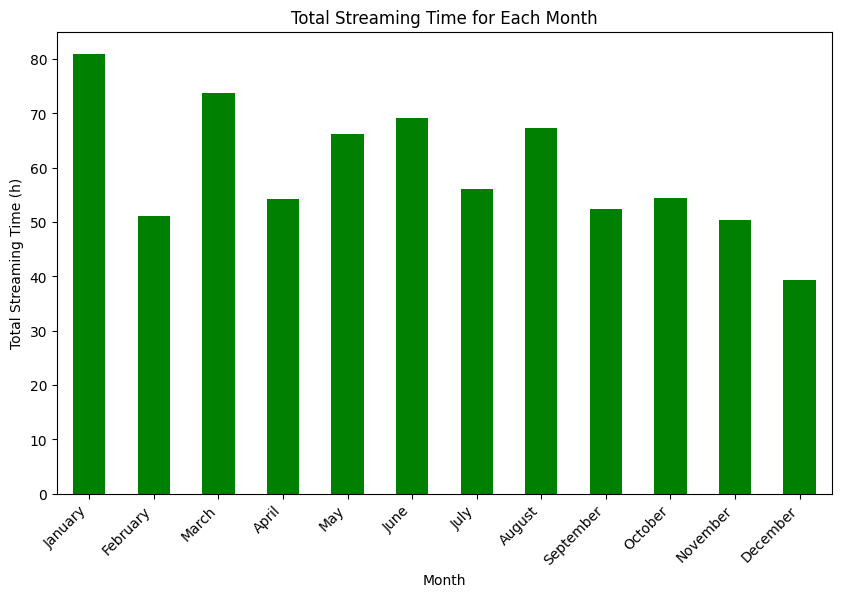

In [130]:
# Group by month and sum msPlayed
monthly_total = streaming_df.groupby('stream_month')['msPlayed'].sum() / (1000 * 60 * 60) 
labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Plot the total streaming time for each month
ax = monthly_total.plot(kind='bar', figsize=(10, 6), color="green")

# Manually set the x-axis ticks and labels
ax.set_xticks(range(len(monthly_total)))
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.title('Total Streaming Time for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Streaming Time (h)')
plt.show()

/var/folders/p4/w5cgd6hs1tsd7tddgjp26yn80000gn/T/ipykernel_33494/3153560611.py:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.05, aspect=10)


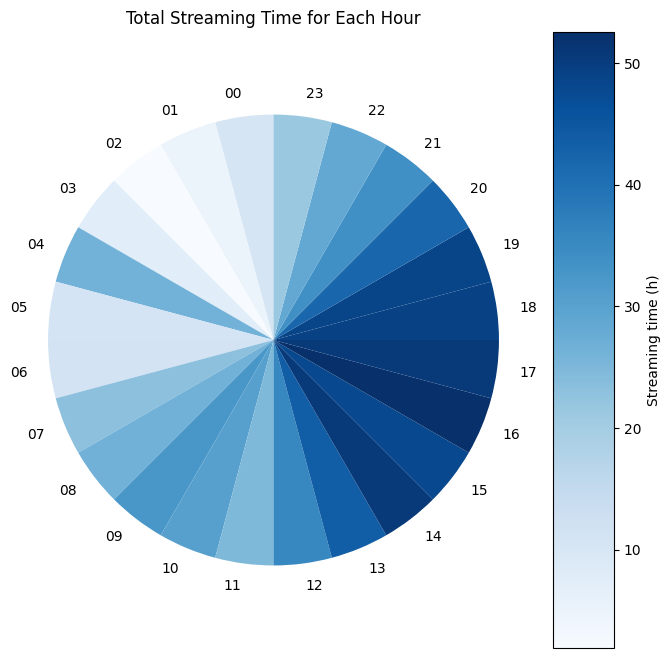

In [125]:
# Group by hour and sum msPlayed
hourly_total = streaming_df.groupby('stream_hour')['msPlayed'].sum() / (1000 * 60 * 60) 

# Normalize the data to create color intensity
normalized_hourly_total = (hourly_total - hourly_total.min()) / (hourly_total.max() - hourly_total.min())

# Create a pie chart
plt.figure(figsize=(8, 8))
pie = plt.pie(np.ones(24), labels=hourly_total.index, startangle=90, colors=plt.cm.Blues(normalized_hourly_total))
plt.axis('equal')
plt.title('Total Streaming Time for Each Hour')

# Create a ScalarMappable to associate colors with values
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=hourly_total.min(), vmax=hourly_total.max()))
sm.set_array([])

# Add a color bar
cbar = plt.colorbar(sm, orientation='vertical', pad=0.05, aspect=10)
cbar.set_label('Streaming time (h)')

plt.show()

### 4.2. Streaming History by Artist and Date

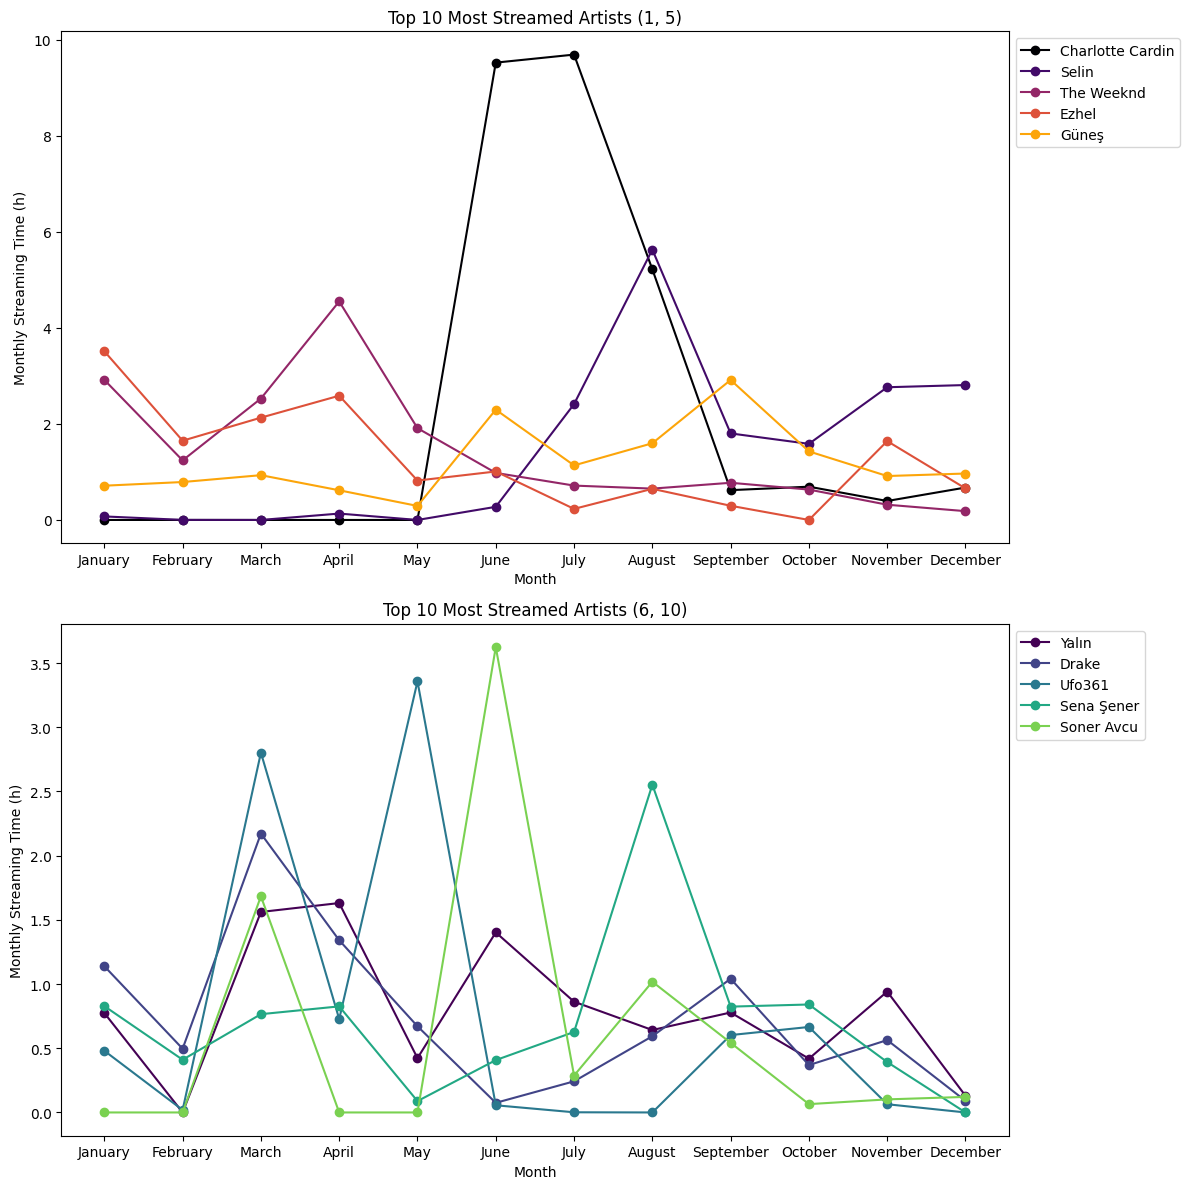

In [255]:
streaming_df = streaming_df[streaming_df["artistName"] != "Joey Bada$$"] # SPECIAL NAMES CAUSE ERROR
month_names = {
    "01": "January",
    "02": "February",
    "03": "March",
    "04": "April",
    "05": "May",
    "06": "June",
    "07": "July",
    "08": "August",
    "09": "September",
    "10": "October",
    "11": "November",
    "12": "December",
}

# Extract relevant columns
data = streaming_df[['artistName', 'stream_month', 'msPlayed']].copy()
data["msPlayed"] = data["msPlayed"] / (1000 * 60 * 60)

# Group by artist and month, summing up the streaming counts
grouped_data = data.groupby(['artistName', 'stream_month'])['msPlayed'].sum().reset_index()

# Pivot the data to have one row per artist and columns for each month
pivot_df = grouped_data.pivot_table(index='artistName', columns='stream_month', values='msPlayed', fill_value=0)

# Sort artists by total stream count
sorted_artists = pivot_df.sum(axis=1).sort_values(ascending=False).index

# Take only the top 10 artists
top_10_artists = sorted_artists[:10]

# Divide the top 10 artists into two groups
top_5_artists_1 = top_10_artists[:5]
top_5_artists_2 = top_10_artists[5:]

# Plot the first subplot with the first 5 artists
plt.figure(figsize=(12, 12))

# Subplot 1
plt.subplot(2, 1, 1)
for i, artist in enumerate(top_5_artists_1):
    plt.plot(pivot_df.columns.map(month_names), pivot_df.loc[artist], label=artist, marker='o', color=plt.cm.inferno(i / len(top_5_artists_2)))
plt.title('Top 10 Most Streamed Artists (1, 5)')
plt.xlabel('Month')
plt.ylabel('Monthly Streaming Time (h)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Subplot 2
plt.subplot(2, 1, 2)
for i, artist in enumerate(top_5_artists_2):
    plt.plot(pivot_df.columns.map(month_names), pivot_df.loc[artist], label=artist, marker='o', color=plt.cm.viridis(i / len(top_5_artists_2)))
plt.title('Top 10 Most Streamed Artists (6, 10)')
plt.xlabel('Month')
plt.ylabel('Monthly Streaming Time (h)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [163]:
print("TOP 20 ARTISTS STREAMED IN 2023")
print("-------------------------------")
for i, artist in enumerate(list(sorted_artists)[:20]):
    print(f"{i + 1}. {artist}")

TOP 20 ARTISTS STREAMED IN 2023
-------------------------------
1. Charlotte Cardin
2. Selin
3. The Weeknd
4. Ezhel
5. Güneş
6. Yalın
7. Drake
8. Ufo361
9. Sena Şener
10. Soner Avcu
11. Kalben
12. Berkay Altunyay
13. Büyük Ev Ablukada
14. M Lisa
15. Billie Eilish
16. Kenan Doğulu
17. Murda
18. Yüzyüzeyken Konuşuruz
19. ALIZADE
20. Miley Cyrus


## 5. Predicting Tracks I Like

* In this part, the aim is to train a model that will predict whether I will like a song or not

* The tracks in my library is marked as the positive class (I liked).
* Most listened songs in 2023 are marked as the negative class if the song is not included in my library.
* Data from: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

* We will do the prediction based on the following features:
* danceability, energy, speechiness, instrumentalness, liveness, valence

### 5.1. Negative Class Preperation

In [210]:
# Read the 2023-spotify data
spotify_2023_df = pd.read_csv("./custom_data/spotify-2023.csv")
spotify_2023_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [211]:
# Iterate over all songs anand save songs which are not included in the library dataframe
liked_tracks = list(library_df["track_name"].copy())

not_liked_tracks = []
for row in spotify_2023_df.itertuples():
    track_name = row[1]
    # If the track is not in the library dataframe, add the track as a "not liked track"
    if (track_name not in liked_tracks):
        danceability = row[18]
        energy = row[20]
        speechiness = row[24]
        instrumentalness = row[22]
        liveness = row[23]
        valence = row[19]

        new_row = {
            "track_name": track_name,
            "danceability": danceability,
            "energy": energy,
            "speechiness": speechiness,
            "instrumentalness": instrumentalness,
            "liveness": liveness,
            "valence": valence,
        }
        not_liked_tracks.append(new_row)

not_liked_tracks_df = pd.DataFrame(not_liked_tracks)
not_liked_tracks_df["is_liked"] = 0
not_liked_tracks_df

,track_name,danceability,energy,speechiness,instrumentalness,liveness,valence,is_liked
0,Seven (feat. Latto) (Explicit Ver.),80,83,4,0,8,89,0
1,LALA,71,74,4,0,10,61,0
2,vampire,51,53,6,0,31,32,0
3,Cruel Summer,55,72,15,0,11,58,0
4,WHERE SHE GOES,65,80,6,63,11,23,0
...,...,...,...,...,...,...,...,...
859,The Great War,57,74,4,0,8,55,0
860,My Mind & Me,60,39,3,0,8,24,0
861,Bigger Than The Whole Sky,42,24,6,1,12,7,0
862,A Veces (feat. Feid),80,67,6,0,8,81,0


In [212]:
# Save it to a csv file
not_liked_tracks_df.to_csv("./custom_data/not-liked-tracks.csv", index=False)

### 5.2. Positive Class Preperation

In [213]:
# Get only the necessary features of library_df
liked_tracks = library_df[["track_name", "danceability", "energy", "speechiness", "instrumentalness", "liveness", "valence"]].copy()

# Round values to integer since the other negative dataset contains integer
liked_tracks["danceability"] = (liked_tracks["danceability"] * 100).astype(int)
liked_tracks["energy"] = (liked_tracks["energy"] * 100).astype(int)
liked_tracks["speechiness"] = (liked_tracks["speechiness"] * 100).astype(int)
liked_tracks["instrumentalness"] = (liked_tracks["instrumentalness"] * 100).astype(int)
liked_tracks["liveness"] = (liked_tracks["liveness"] * 100).astype(int)
liked_tracks["valence"] = (liked_tracks["valence"] * 100).astype(int)

# Add the label (is_liked) column
liked_tracks["is_liked"] = 1
liked_tracks

,track_name,danceability,energy,speechiness,instrumentalness,liveness,valence,is_liked
0,Dreams - 2004 Remaster,82,49,2,0,12,78,1
1,Dust,56,53,22,0,8,40,1
2,Fado,82,54,6,0,10,58,1
3,Feels Like Summer,75,71,6,0,15,47,1
4,Bana Yalan Söylediler,30,60,7,0,75,44,1
...,...,...,...,...,...,...,...,...
1205,Şaka Yaptım - Armageddon Turk 'Arada' Mix,79,80,4,10,19,57,1
1206,hatırla,60,67,21,0,12,29,1
1207,Wish Me Luck,64,85,3,0,9,3,1
1208,Sen Benim Şarkılarımsın,55,38,4,0,11,35,1


In [214]:
# Save the dataframe to a csv file
liked_tracks.to_csv("./custom_data/liked-tracks.csv", index=False)

### 5.3. Combine the Datasets

In [217]:
liked_tracks_df = pd.read_csv("./custom_data/liked-tracks.csv")
not_liked_tracks_df = pd.read_csv("./custom_data/not-liked-tracks.csv")

final_df = liked_tracks.append(not_liked_tracks_df, ignore_index=True)
final_df

/var/folders/p4/w5cgd6hs1tsd7tddgjp26yn80000gn/T/ipykernel_33494/1378267277.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = liked_tracks.append(not_liked_tracks_df, ignore_index=True)


,track_name,danceability,energy,speechiness,instrumentalness,liveness,valence,is_liked
0,Dreams - 2004 Remaster,82,49,2,0,12,78,1
1,Dust,56,53,22,0,8,40,1
2,Fado,82,54,6,0,10,58,1
3,Feels Like Summer,75,71,6,0,15,47,1
4,Bana Yalan Söylediler,30,60,7,0,75,44,1
...,...,...,...,...,...,...,...,...
2069,The Great War,57,74,4,0,8,55,0
2070,My Mind & Me,60,39,3,0,8,24,0
2071,Bigger Than The Whole Sky,42,24,6,1,12,7,0
2072,A Veces (feat. Feid),80,67,6,0,8,81,0


In [224]:
# Shuffle the rows and save to a csv file
final_df = final_df.sample(frac=1).reset_index(drop=True)
final_df.to_csv("./custom_data/all-tracks.csv", index=False)

### 5.4. Prepare the Model

a. Split the dataset into train and test

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [234]:
df = pd.read_csv("./custom_data/all-tracks.csv")

# Drop the track_name column
df = df.drop(columns=["track_name"])

# Split into features and target variable
X = df.drop(columns=["is_liked"])
y = df['is_liked']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

b. Train a random forest model

In [246]:
rf_classifier = RandomForestClassifier(random_state=42)
# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test and train set
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

# Print baseline accuracy
imbalance = round(y.value_counts()[1] / len(y) * 100, 2)
print(f"Positive class percentage: {imbalance}%")

Positive class percentage: 58.34%


Accuracy on the test set: 66.75%


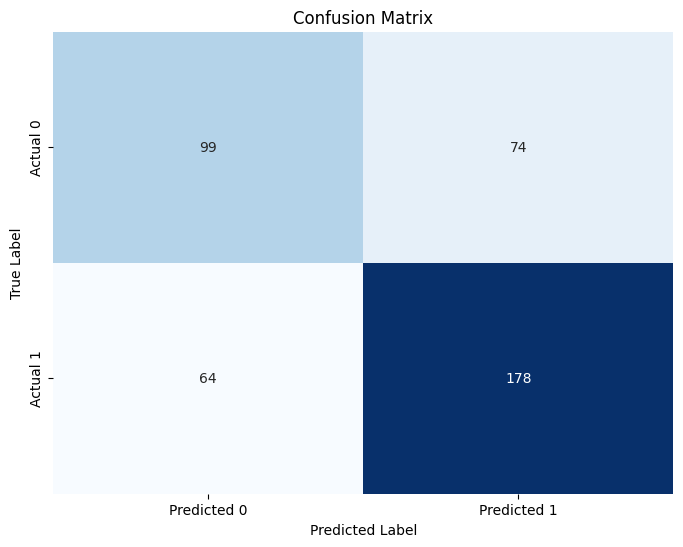

In [241]:
# Evaluate on the test set
# Evaluate the performance on the training set
test_accuracy = round(100 * accuracy_score(y_test, y_pred_test), 2)
print(f"Accuracy on the test set: {test_accuracy}%")

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 5.5. Hyperparameter Tuning

In [247]:
from skopt import BayesSearchCV

In [248]:
# In this part, we tune the hyperparameters using bayesian search
rf_classifier = RandomForestClassifier()

param_grid_rf = {
    'n_estimators':[100, 120, 140, 160, 180, 200, 220],
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth':[6, 8, 10, 12, 14],
    'max_features':[5, 6, 8, 10, 12]
}

model = BayesSearchCV(estimator=rf_classifier, search_spaces=param_grid_rf, n_iter=100, scoring='average_precision', cv=5, return_train_score=True, verbose=3)
model.fit(X_train, y_train)

best_params = model.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=8, max_features=12, n_estimators=200;, score=(train=0.957, test=0.752) total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=8, max_features=12, n_estimators=200;, score=(train=0.957, test=0.766) total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=8, max_features=12, n_estimators=200;, score=(train=0.963, test=0.809) total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=8, max_features=12, n_estimators=200;, score=(train=0.966, test=0.747) total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=8, max_features=12, n_estimators=200;, score=(train=0.963, test=0.756) total time=   0.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=12, max_features=8, n_estimators=180;, score=(train=1.000, test=0.743) total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=12, max_features=8, n_estimators=180;, score=(train=1.000, test=0.770

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.891, test=0.768) total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.888, test=0.781) total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.888, test=0.815) total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.898, test=0.749) total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.890, test=0.760) total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=10, max_features=5, n_estimators=140;, score=(train=0.982, test=0.764) total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=5, n_estimators=140;, score=(train=0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=140;, score=(train=0.891, test=0.766) total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=140;, score=(train=0.890, test=0.775) total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=140;, score=(train=0.890, test=0.813) total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=140;, score=(train=0.897, test=0.751) total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=140;, score=(train=0.890, test=0.762) total time=   0.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=8, max_features=5, n_estimators=100;, score=(train=0.946, test=0.761) total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=5, n_estimators=100;, score=(train=0.9

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.890, test=0.767) total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.892, test=0.777) total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.889, test=0.814) total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.896, test=0.753) total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.890, test=0.769) total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.890, test=0.768) total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.8

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.887, test=0.770) total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.890, test=0.784) total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.890, test=0.812) total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.896, test=0.759) total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=100;, score=(train=0.888, test=0.763) total time=   0.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=log_loss, max_depth=10, max_features=10, n_estimators=140;, score=(train=0.983, test=0.768) total time=   0.5s
[CV 2/5] END criterion=log_loss, max_depth=10, max_features=10, n_estimators=140;, score=(tra

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=160;, score=(train=0.890, test=0.763) total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=160;, score=(train=0.890, test=0.769) total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=160;, score=(train=0.890, test=0.820) total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=160;, score=(train=0.895, test=0.761) total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=160;, score=(train=0.891, test=0.762) total time=   0.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=14, max_features=6, n_estimators=100;, score=(train=1.000, test=0.764) total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=6, n_estimators=100;, score=(train=1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=180;, score=(train=0.892, test=0.762) total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=180;, score=(train=0.889, test=0.775) total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=180;, score=(train=0.889, test=0.821) total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=180;, score=(train=0.897, test=0.756) total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=180;, score=(train=0.892, test=0.763) total time=   0.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=8, max_features=5, n_estimators=220;, score=(train=0.958, test=0.757) total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=8, max_features=5, n_estimators=220;, score=(train=0.954, te

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.890, test=0.771) total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.888, test=0.775) total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.887, test=0.814) total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.896, test=0.750) total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.892, test=0.772) total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=12, max_features=10, n_estimators=180;, score=(train=0.998, test=0.764) total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=10, n_estimators=180;, score=(train

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.891, test=0.769) total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.890, test=0.778) total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.890, test=0.819) total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.896, test=0.751) total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.893, test=0.767) total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=gini, max_depth=14, max_features=10, n_estimators=220;, score=(train=1.000, test=0.750) total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=14, max_features=10, n_estimators=220;, score=(train=1.000

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.892, test=0.768) total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.890, test=0.771) total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.889, test=0.821) total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.896, test=0.755) total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.890, test=0.767) total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.891, test=0.765) total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.890, test=0.775) total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.892, test=0.821) total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.897, test=0.758) total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.891, test=0.764) total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=log_loss, max_depth=12, max_features=8, n_estimators=220;, score=(train=0.999, test=0.768) total time=   0.8s
[CV 2/5] END criterion=log_loss, max_depth=12, max_features=8, n_estimators=220;, score=(train

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.890, test=0.762) total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.890, test=0.766) total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.890, test=0.819) total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.898, test=0.754) total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.892, test=0.767) total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.890, test=0.767) total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.890, test=0.774) total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.892, test=0.815) total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.897, test=0.753) total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=220;, score=(train=0.890, test=0.764) total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=log_loss, max_depth=8, max_features=12, n_estimators=140;, score=(train=0.941, test=0.771) total time=   0.4s
[CV 2/5] END criterion=log_loss, max_depth=8, max_features=12, n_estimators=140;, score=(train

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=200;, score=(train=0.890, test=0.762) total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=200;, score=(train=0.891, test=0.768) total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=200;, score=(train=0.893, test=0.821) total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=200;, score=(train=0.897, test=0.758) total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=200;, score=(train=0.890, test=0.763) total time=   0.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=log_loss, max_depth=8, max_features=8, n_estimators=160;, score=(train=0.944, test=0.758) total time=   0.5s
[CV 2/5] END criterion=log_loss, max_depth=8, max_features=8, n_estimators=160;, score=(train=0

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=180;, score=(train=0.890, test=0.760) total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=180;, score=(train=0.888, test=0.781) total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=180;, score=(train=0.890, test=0.819) total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=180;, score=(train=0.896, test=0.753) total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=180;, score=(train=0.892, test=0.763) total time=   0.4s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=120;, score=(train=0.888, test=0.762) total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=5, n_estimators=120;, score=(train=0.8

In [249]:
# Hyperparameter tuned final model

rf_tuned_model = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    criterion=best_params["criterion"],
    max_depth=best_params["max_depth"],
    max_features=best_params["max_features"]
)

rf_tuned_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=5)

Accuracy on the test set: 65.3%


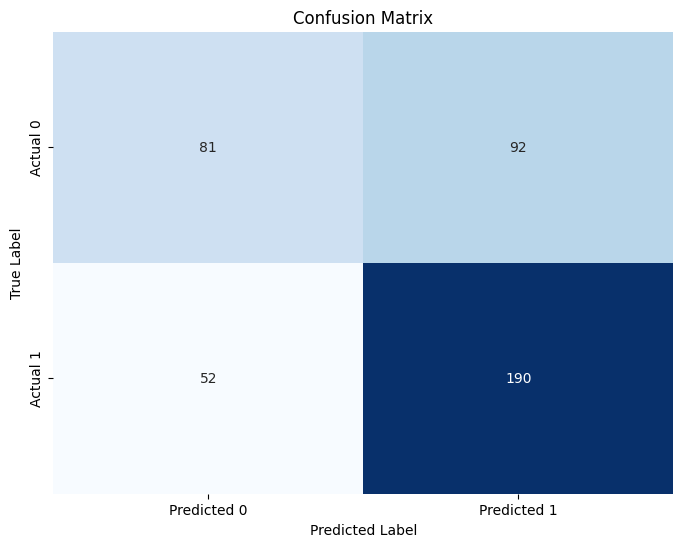

In [250]:
# Make predictions on the test and train set
y_pred_test = rf_tuned_model.predict(X_test)

# Evaluate on the test set
test_accuracy = round(100 * accuracy_score(y_test, y_pred_test), 2)
print(f"Accuracy on the test set: {test_accuracy}%")

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()